# [Post-training dynamic range quantization](https://www.tensorflow.org/lite/performance/post_training_quant)

## Build an MNIST model

In [2]:
# install tensorflow
!pip install tensorflow

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.5 MB/s eta 0:00:0000:0100:01
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB ? eta 0:00:000:00:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 4.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━

In [3]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [4]:
# Clear any logs from previous runs
!rm -rf ./logs/

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [5]:
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pathlib

2023-12-07 14:50:46.783726: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-07 14:50:46.836111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 14:50:47.499187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Train a TensorFlow model

In [6]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
# Define the model architecture
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

2023-12-07 15:28:39.241025: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-07 15:28:42.474053: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# Train the digit classification model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(
  train_images,
  train_labels,
  epochs=1,
  validation_data=(test_images, test_labels)
)

1875/1875 [==============================] - 15s 5ms/step - loss: 0.2596 - accuracy: 0.9292 - val_loss: 0.1068 - val_accuracy: 0.9685


## Convert to a TensorFlow Lite model

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpdzhe56s6/assets


INFO:tensorflow:Assets written to: /tmp/tmpdzhe56s6/assets
2023-12-07 15:54:55.229412: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-12-07 15:54:55.229502: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-12-07 15:54:55.323146: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpdzhe56s6
2023-12-07 15:54:55.323732: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-12-07 15:54:55.323746: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpdzhe56s6
2023-12-07 15:54:55.467535: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-12-07 15:54:55.468676: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-12-07 15:54:55.737904: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

In [11]:
tflite_models_dir = pathlib.Path("/tmp/mnist_tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [12]:
tflite_model_file = tflite_models_dir/"mnist_model.tflite"
tflite_model_file.write_bytes(tflite_model)

84820

In [13]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"mnist_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmpkvmm75_x/assets


INFO:tensorflow:Assets written to: /tmp/tmpkvmm75_x/assets
2023-12-07 15:55:57.480745: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-12-07 15:55:57.480799: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-12-07 15:55:57.480951: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpkvmm75_x
2023-12-07 15:55:57.481462: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-12-07 15:55:57.481472: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpkvmm75_x
2023-12-07 15:55:57.483040: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-12-07 15:55:57.508204: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpkvmm75_x
2023-12-07 15:55:57.514709: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

24064

In [20]:
ls -lh {tflite_models_dir}

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
total 108K
-rw-r--r-- 1 mbmk92 mbmk92 83K Dec  7 15:55 mnist_model.tflite
-rw-r--r-- 1 mbmk92 mbmk92 24K Dec  7 15:55 mnist_model_quant.tflite


## Run the TFLite models

In [21]:
# Load the model into an interpreter
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_file))
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [22]:
interpreter_quant = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter_quant.allocate_tensors()

In [23]:
#Test the model on one image
test_image = np.expand_dims(test_images[0], axis=0).astype(np.float32)

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

interpreter.set_tensor(input_index, test_image)
interpreter.invoke()
predictions = interpreter.get_tensor(output_index)

In [26]:
!pip install matplotlib

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 717.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 4.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 1.3 MB/s eta 0:00:00:00:01


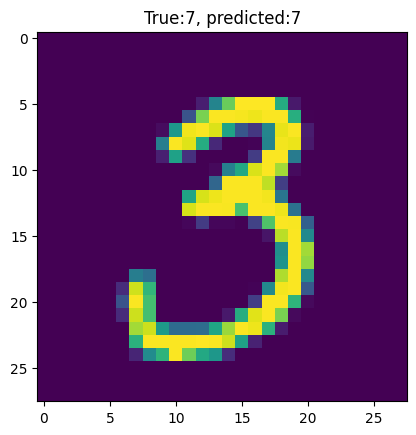

In [29]:
import matplotlib.pylab as plt

plt.imshow(test_images[90])
template = "True:{true}, predicted:{predict}"
_ = plt.title(template.format(true= str(test_labels[0]),
                              predict=str(np.argmax(predictions[0]))))
plt.grid(False)

In [30]:
# Evaluate the models
# A helper function to evaluate the TF Lite model using "test" dataset.
def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for test_image in test_images:
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  # Compare prediction results with ground truth labels to calculate accuracy.
  accurate_count = 0
  for index in range(len(prediction_digits)):
    if prediction_digits[index] == test_labels[index]:
      accurate_count += 1
  accuracy = accurate_count * 1.0 / len(prediction_digits)

  return accuracy

In [31]:
print(evaluate_model(interpreter))

0.9685


In [32]:
print(evaluate_model(interpreter_quant))

0.9684


# Optimizing an existing model

In [35]:
!pip install tensorflow_hub

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 886.7 kB/s eta 0:00:000:00:01


In [36]:
import tensorflow_hub as hub

resnet_v2_101 = tf.keras.Sequential([
  keras.layers.InputLayer(input_shape=(224, 224, 3)),
  hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4")
])

converter = tf.lite.TFLiteConverter.from_keras_model(resnet_v2_101)

In [37]:
# Convert to TF Lite without quantization
resnet_tflite_file = tflite_models_dir/"resnet_v2_101.tflite"
resnet_tflite_file.write_bytes(converter.convert())

INFO:tensorflow:Assets written to: /tmp/tmp2ifiesq9/assets


INFO:tensorflow:Assets written to: /tmp/tmp2ifiesq9/assets
2023-12-07 16:10:58.398121: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-12-07 16:10:58.398176: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-12-07 16:10:58.398420: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp2ifiesq9
2023-12-07 16:10:58.415754: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-12-07 16:10:58.415787: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp2ifiesq9
2023-12-07 16:11:15.032991: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-12-07 16:12:12.061190: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmp2ifiesq9
2023-12-07 16:12:12.528964: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

178422328

In [38]:
# Convert to TF Lite with quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
resnet_quantized_tflite_file = tflite_models_dir/"resnet_v2_101_quantized.tflite"
resnet_quantized_tflite_file.write_bytes(converter.convert())

INFO:tensorflow:Assets written to: /tmp/tmp56muddmq/assets


INFO:tensorflow:Assets written to: /tmp/tmp56muddmq/assets
2023-12-07 16:17:57.640209: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-12-07 16:17:57.640264: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-12-07 16:17:57.640508: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp56muddmq
2023-12-07 16:17:57.658316: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-12-07 16:17:57.658351: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp56muddmq
2023-12-07 16:17:57.730122: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-12-07 16:17:58.557610: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmp56muddmq
2023-12-07 16:17:58.791896: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

45733968

In [39]:
!ls -lh {tflite_models_dir}/*.tflite

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
-rw-r--r-- 1 mbmk92 mbmk92  83K Dec  7 15:55 /tmp/mnist_tflite_models/mnist_model.tflite
-rw-r--r-- 1 mbmk92 mbmk92  24K Dec  7 15:55 /tmp/mnist_tflite_models/mnist_model_quant.tflite
-rw-r--r-- 1 mbmk92 mbmk92 171M Dec  7 16:17 /tmp/mnist_tflite_models/resnet_v2_101.tflite
-rw-r--r-- 1 mbmk92 mbmk92  44M Dec  7 16:18 /tmp/mnist_tflite_models/resnet_v2_101_quantized.tflite
